In [1]:
from keras.datasets import cifar10
import numpy as np

np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

print('train_data:','images:',x_img_train.shape,'labels:',y_label_train.shape)
print('test data:','images:',x_img_test.shape,'labels:',y_label_test.shape)

170500096/170498071 [==============================] - 6s 0us/step
train_data: images: (50000, 32, 32, 3) labels: (50000, 1)
test data: images: (10000, 32, 32, 3) labels: (10000, 1)


In [0]:
x_img_train_normalize=x_img_train.astype('float32')/255
x_img_test_normalize=x_img_test.astype('float32')/255

In [4]:
from keras.utils import np_utils

y_label_train_OneHot=np_utils.to_categorical(y_label_train)
y_label_test_OneHot=np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

model=Sequential()

In [6]:
#Layer1

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(Dropout(rate=0.25))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
#Layer2
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [0]:
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

In [12]:
model.add(Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [13]:
try:
  model.load_weights('SaveModel/cifarCnnModel.h5')
  print('Load successifully!')
except:
  print('Load failed!')

Load failed!


In [14]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [15]:
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.25,epochs=12,batch_size=128,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 37500 samples, validate on 12500 samples
Epoch 1/12





37500/37500 [==============================] - 20s 527us/step - loss: 2.1650 - acc: 0.1986 - val_loss: 2.0520 - val_acc: 0.2955
Epoch 2/12
37500/37500 [==============================] - 4s 105us/step - loss: 1.9549 - acc: 0.2962 - val_loss: 1.9351 - val_acc: 0.3462
Epoch 3/12
37500/37500 [==============================] - 4s 105us/step - loss: 1.8343 - acc: 0.3464 - val_loss: 1.8421 - val_acc: 0.3829
Epoch 4/12
37500/37500 [==============================] - 4s 106us/step - loss: 1.7308 - acc: 0.3814 - val_loss: 1.7491 - val_acc: 0.4170
Epoch 5/12
37500/37500 [==============================] - 4s 104us/step - loss: 1.6501 - acc: 0.4097 - val_loss: 1.6815 - val_acc: 0.4384
Epoch 6/12
37500/37500 [==============================] - 4s 106us/step - loss: 1.5863 - acc: 0.4306 - val_loss: 1.6512 - val_acc: 0.4493
Epoch 7/12
37500/37

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_train_history(train_acc,test_acc):
  plt.plot(train_history.history[train_acc])
  plt.plot(train_history.history[test_acc])
  plt.title('Train History')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train_acc','val_acc'],loc='upper left')
  plt.show()

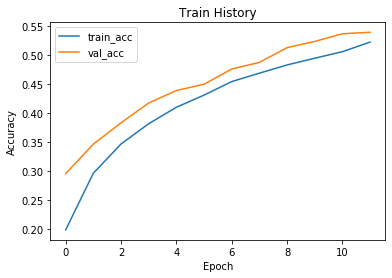

In [17]:
show_train_history('acc','val_acc')